<a href="https://colab.research.google.com/github/HusseinIssaOp/SeniorProjectISD/blob/main/Nbk_TensorFlow_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
la = list(uploaded.keys())[0]

Saving NBKFINAL.csv to NBKFINAL.csv


In [ ]:
data = pd.read_csv(la)
data.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
5912,5912,3/27/2023,1.007619,1.008571,0.998095,0.999047,0.974271,2737830.0
5913,5913,3/28/2023,1.002857,1.009523,0.999047,1.008571,0.983559,4116152.0
5914,5914,3/29/2023,1.008571,1.008571,0.999047,1.001904,0.977057,3643277.0
5915,5915,3/30/2023,1.057000,1.065000,1.052000,1.056000,1.029812,5053925.0
5916,5916,4/2/2023,1.013333,1.027619,1.009523,1.009523,0.984488,2967382.0


In [ ]:

# installed it for indicators
!pip install pandas_ta
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 598.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=ba971b8e995bd757e01910a367f1c6bfde1fd2f0449b5bde6d93fa64fb166820
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
data['Adj Close'].fillna(data['Adj Close'].mean(), inplace=True)

In [ ]:
# technical indictaors models for analysis 12/12/2023

data['RSI']=ta.rsi(data.Close, length=10) #speed of price movemmmnt
data['EMAF']=ta.ema(data.Close, length=50)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150) #length is the previous days depending


data['Target'] = data['Adj Close']-data.Open
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data['Target'] = data['Target'].shift(-1)

#added the a feature which is named target its the subtraction of close - open




#moving averages fast/mid/slow
data.dropna(inplace=True)

columns_to_drop = ['Unnamed: 0', 'Date', 'Volume']
data.drop(columns=columns_to_drop, inplace=True)

data

,Open,High,Low,Close,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
149,0.595653,0.599708,0.591773,0.596257,0.431907,60.376324,0.309486,0.302445,0.297431,-0.088028,0.144317
150,0.232345,0.232345,0.232345,0.232345,0.144317,47.390763,0.306461,0.301056,0.296569,-0.088028,0.144317
151,0.232345,0.232345,0.232345,0.232345,0.144317,47.390763,0.303555,0.299696,0.295718,-0.088028,0.144317
152,0.232345,0.232345,0.232345,0.232345,0.144317,47.390763,0.300762,0.298362,0.294879,-0.088028,0.144317
153,0.232345,0.232345,0.232345,0.232345,0.144317,47.390763,0.298079,0.297055,0.294050,-0.163746,0.431907
...,...,...,...,...,...,...,...,...,...,...,...
5911,1.000952,1.009523,0.998095,1.003809,0.978915,33.355149,1.037550,1.034588,1.026649,-0.033348,0.974271
5912,1.007619,1.008571,0.998095,0.999047,0.974271,31.306365,1.036040,1.033884,1.026283,-0.019298,0.983559
5913,1.002857,1.009523,0.999047,1.008571,0.983559,39.556655,1.034963,1.033383,1.026049,-0.031514,0.977057
5914,1.008571,1.008571,0.999047,1.001904,0.977057,36.177132,1.033667,1.032760,1.025729,-0.027188,1.029812


In [ ]:
data.drop(columns='Close', inplace=True)

In [ ]:
data.head()


,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
149,0.595653,0.599708,0.591773,0.431907,60.376324,0.309486,0.302445,0.297431,-0.088028,0.144317
150,0.232345,0.232345,0.232345,0.144317,47.390763,0.306461,0.301056,0.296569,-0.088028,0.144317
151,0.232345,0.232345,0.232345,0.144317,47.390763,0.303555,0.299696,0.295718,-0.088028,0.144317
152,0.232345,0.232345,0.232345,0.144317,47.390763,0.300762,0.298362,0.294879,-0.088028,0.144317
153,0.232345,0.232345,0.232345,0.144317,47.390763,0.298079,0.297055,0.294050,-0.163746,0.431907


In [ ]:
data_set = data.iloc[:, 0:11]
data_set.tail(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
5896,1.046666,1.056190,1.046666,1.029069,54.839188,1.045078,1.036131,1.025734,-0.016905,1.039285
5897,1.056190,1.065714,1.052380,1.039285,59.955403,1.045887,1.036717,1.026263,-0.028287,1.037427
5898,1.065714,1.068571,1.061904,1.037427,58.613740,1.046590,1.037253,1.026761,-0.024430,1.035570
5899,1.060000,1.066666,1.058095,1.035570,57.191719,1.047190,1.037741,1.027226,-0.027169,1.030926
5900,1.058095,1.061904,1.053333,1.030926,53.581192,1.047581,1.038126,1.027622,-0.033646,1.023496
5901,1.057142,1.057142,1.041904,1.023496,48.174622,1.047657,1.038351,1.027913,-0.025169,1.027211
5902,1.052380,1.055238,1.046666,1.027211,50.925971,1.047879,1.038648,1.028249,-0.061415,0.991918
5903,1.053333,1.053333,1.017142,0.991918,32.638153,1.046674,1.038222,1.028102,-0.025437,1.000277
5904,1.025714,1.034285,1.019047,1.000277,38.454593,1.045852,1.037974,1.028070,-0.033748,0.990061
5905,1.023809,1.027619,1.015238,0.990061,34.418959,1.044652,1.037524,1.027900,-0.019699,0.999348


In [ ]:
from sklearn.preprocessing import MinMaxScaler

    #because im using neural networks so btw 0 and 1
zz = MinMaxScaler(feature_range=(0,1))
data_set_scaled = zz.fit_transform(data_set)
print(data_set_scaled)

[[0.5488804  0.55068566 0.54770691 ... 0.01602659 0.77344628 0.13607808]
 [0.21378996 0.21304132 0.2147329  ... 0.0148659  0.77344628 0.13607808]
 [0.21378996 0.21304132 0.2147329  ... 0.01372059 0.77344628 0.13607808]
 ...
 [0.92445737 0.92734686 0.92500519 ... 0.9970372  0.91588575 0.92358599]
 [0.92972757 0.92647187 0.92500519 ... 0.99660662 0.92678913 0.97347549]
 [0.97439516 0.97833586 0.97406082 ... 0.99714645 0.92261278 0.93061336]]


In [ ]:
print(data_set_scaled.shape[0])

5767


In [ ]:
X = []

backcandles = 30      # choosing how many days before to predict it


for j in range(9):                     # the first 9 columns are the input
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])


In [ ]:

  #stackoverflow helping the this line due to error
X=np.moveaxis(X, [0], [2])


X, yt =np.array(X), np.array(data_set_scaled[backcandles:,-1])  # the last 1 columns
y=np.reshape(yt,(len(yt),1))

In [ ]:

print(X)
print(X.shape)

[[[0.5488804  0.55068566 0.54770691 ... 0.02955698 0.01602659 0.77344628]
  [0.21378996 0.21304132 0.2147329  ... 0.02772721 0.0148659  0.77344628]
  [0.21378996 0.21304132 0.2147329  ... 0.02593368 0.01372059 0.77344628]
  ...
  [0.23053212 0.23306119 0.2315489  ... 0.03136456 0.01914963 0.75264771]
  [0.23388018 0.23306119 0.2315489  ... 0.03006756 0.01833602 0.75264771]
  [0.23388018 0.23306119 0.23491173 ... 0.02879624 0.01753319 0.58260469]]

 [[0.21378996 0.21304132 0.2147329  ... 0.02772721 0.0148659  0.77344628]
  [0.21378996 0.21304132 0.2147329  ... 0.02593368 0.01372059 0.77344628]
  [0.21378996 0.21304132 0.2147329  ... 0.02417566 0.01259045 0.77344628]
  ...
  [0.23388018 0.23306119 0.2315489  ... 0.03006756 0.01833602 0.75264771]
  [0.23388018 0.23306119 0.23491173 ... 0.02879624 0.01753319 0.58260469]
  [0.5488804  0.55068566 0.54770691 ... 0.03648051 0.02284222 0.74571401]]

 [[0.21378996 0.21304132 0.2147329  ... 0.02593368 0.01372059 0.77344628]
  [0.21378996 0.213041

In [ ]:
print(y)
print(y.shape)

[[0.1531382 ]
 [0.15527072]
 [0.1531382 ]
 ...
 [0.92358599]
 [0.97347549]
 [0.93061336]]
(5737, 1)


In [ ]:
splitdata =  int(len(X)*0.80) # 80% training data
print(splitdata)

4589


In [ ]:
    #split training and testing using the arrays up
X_train, X_test = X[:splitdata], X[splitdata:]
y_train, y_test = y[:splitdata], y[splitdata:]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4589, 30, 9)
(4589, 1)
(1148, 30, 9)
(1148, 1)


In [ ]:
from keras.layers import LSTM

from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Dropout

from keras.models import  Sequential


import tensorflow as tf
import keras
from keras.models import Model
from keras import optimizers
from keras.callbacks import History
from keras.layers import Input, Activation, concatenate


import numpy as np
# imported all the libraries am using keras , tensorflow etc

In [ ]:



lstm_input = Input(shape=(backcandles,9), name='lstm_input') #shape is 30 days with 9 columns in input
inputs = LSTM(250, name='first_layer')(lstm_input)

#200 nodes for lstm anddd 1 for dense layer
#inter mediate layer
inputs = Dense(1,name='dense_layer')(inputs)
output = Activation('linear',name='output')(inputs)

#added them to t he model <<
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam,loss='mse')


#model fir ..
model.fit(x=X_train,y=y_train,batch_size=1500,epochs=200,shuffle=True, validation_data=(X_test, y_test))

Epoch 1/200
4/4 [==============================] - 9s 1s/step - loss: 0.0626 - val_loss: 0.0189
Epoch 2/200
4/4 [==============================] - 7s 2s/step - loss: 0.0069 - val_loss: 0.1259
Epoch 3/200
4/4 [==============================] - 6s 1s/step - loss: 0.0090 - val_loss: 0.0254
Epoch 4/200
4/4 [==============================] - 7s 2s/step - loss: 0.0036 - val_loss: 0.0095
Epoch 5/200
4/4 [==============================] - 6s 1s/step - loss: 0.0039 - val_loss: 0.0359
Epoch 6/200
4/4 [==============================] - 6s 2s/step - loss: 0.0017 - val_loss: 0.0596
Epoch 7/200
4/4 [==============================] - 6s 1s/step - loss: 0.0028 - val_loss: 0.0418
Epoch 8/200
4/4 [==============================] - 6s 1s/step - loss: 0.0013 - val_loss: 0.0225
Epoch 9/200
4/4 [==============================] - 8s 2s/step - loss: 0.0018 - val_loss: 0.0238
Epoch 10/200
4/4 [==============================] - 6s 1s/step - loss: 0.0014 - val_loss: 0.0368
Epoch 11/200
4/4 [=====================

In [ ]:
y_pred = model.predict(X_test)

for i in range(10):
  print(y_pred[i], y_test[i])

36/36 [==============================] - 1s 25ms/step
[0.5039083] [0.49199621]
[0.5041565] [0.49199621]
[0.5045469] [0.48371109]
[0.50478476] [0.48016005]
[0.4978847] [0.47601701]
[0.49218586] [0.478977]
[0.4873672] [0.47483396]
[0.48606378] [0.47720101]
[0.48399273] [0.47364997]
[0.48383024] [0.47838406]


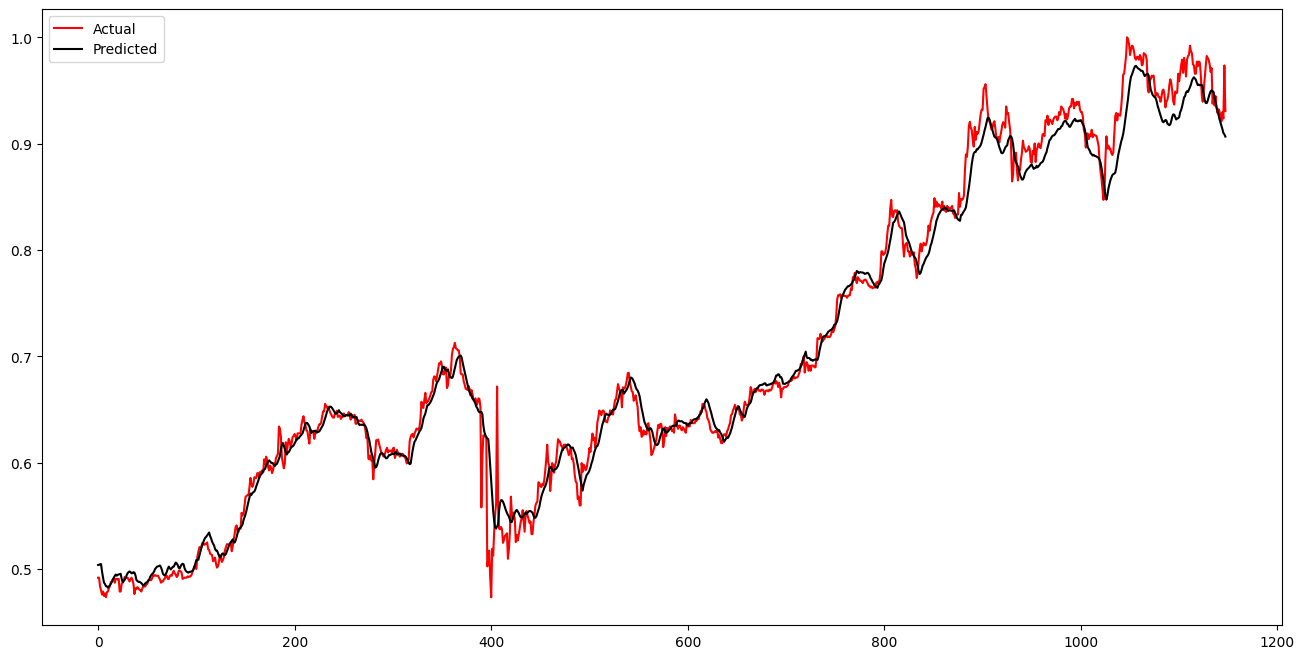

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = "red", label='Actual')
plt.plot(y_pred, color = "black", label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_reshaped = data_set.TargetNextClose.values.reshape(-1, 1)

zz.fit(data_reshaped)


y_pred_original = zz.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = zz.inverse_transform(y_test.reshape(-1, 1)).flatten()

last_50_indices = range(-50, 0)
for i in last_50_indices:
    print(f"Prediction: {y_pred_original[i]}, Actual: {y_test_original[i]}")



Prediction: 0.9771082997322083, Actual: 1.003063
Prediction: 0.9774205684661865, Actual: 1.021639
Prediction: 0.9785546064376831, Actual: 1.014209
Prediction: 0.9833347797393799, Actual: 1.021639
Prediction: 0.9855483174324036, Actual: 1.029997
Prediction: 0.9891881346702576, Actual: 1.03557
Prediction: 0.9937283396720886, Actual: 1.022567
Prediction: 0.9981871247291565, Actual: 1.037427
Prediction: 0.9993276000022888, Actual: 1.030926
Prediction: 1.0029937028884888, Actual: 1.018852
Prediction: 1.0042833089828491, Actual: 1.03557
Prediction: 1.0035619735717773, Actual: 1.039285
Prediction: 1.0058624744415283, Actual: 1.040213
Prediction: 1.0082545280456543, Actual: 1.049501
Prediction: 1.010872721672058, Actual: 1.043929
Prediction: 1.0147035121917725, Actual: 1.042071
Prediction: 1.0167597532272339, Actual: 1.030926
Prediction: 1.0181370973587036, Actual: 1.029997
Prediction: 1.0168935060501099, Actual: 1.021639
Prediction: 1.0156341791152954, Actual: 1.021639
Prediction: 1.012583971

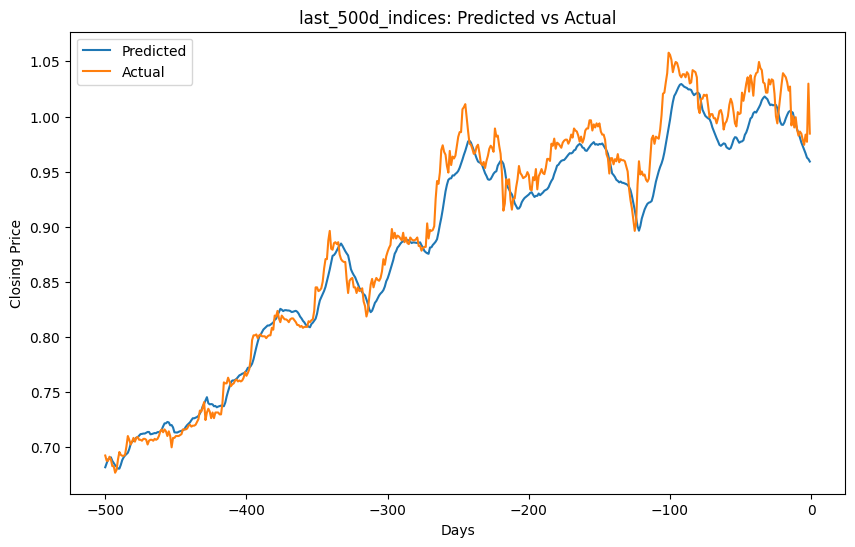

In [ ]:
import matplotlib.pyplot as plt


data_reshaped = data_set.TargetNextClose.values.reshape(-1, 1)

zz.fit(data_reshaped)

y_pred_original = zz.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = zz.inverse_transform(y_test.reshape(-1, 1)).flatten()

last_500d_indices = range(-500, 0)

plt.figure(figsize=(10, 6))
plt.plot(last_500d_indices, y_pred_original[last_500d_indices], label='Predicted')
plt.plot(last_500d_indices, y_test_original[last_500d_indices], label='Actual')
plt.title('last_500d_indices: Predicted vs Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mse = model.evaluate(X_test, y_test, verbose=0)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}') #low error good
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 0.0003111070254817605
Mean Absolute Error (MAE): 0.011904644888697457
R-squared: 0.9862434068037249
